# Pymaceuticals Inc.
---

### Analysis

- The average tumor volume for mice treated with the Capomulin regimen ranges from approximately 34.56 mm3 to 45.80 mm3, suggesting Capomulin's effectiveness in controlling tumor growth.

- The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84, indicating a strong positive correlation. This suggests that heavier mice tend to have larger tumor volumes under this treatment.

- Capomulin and Ramicane regimens show lower median tumor volumes compared to Infubinol and Ceftamin in the box plot analysis, indicating these treatments might be more effective in reducing tumor sizes.
 

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [76]:
# Checking the number of mice.
mice_count = combined_df["Mouse ID"].nunique()
mice_count

249

In [77]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_df[combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice_id = duplicate_mice["Mouse ID"].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [78]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [79]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df[~combined_df["Mouse ID"].isin(duplicate_mice_id)]
cleaned_df
#now use drop
cleaned_df = combined_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)
cleaned_df
#get cleaned df mouse where id "g989"
cleaned_df_mouse = cleaned_df[cleaned_df["Mouse ID"] == "g989"]
cleaned_df_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
596,g989,Propriva,Female,21,26,25,56.045564,1
597,g989,Propriva,Female,21,26,30,59.082294,1
598,g989,Propriva,Female,21,26,35,62.570880,2


In [80]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_count = cleaned_df["Mouse ID"].nunique()
cleaned_mice_count

249

## Summary Statistics

In [81]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
tumor_volume_mean = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_volume_median = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_sem = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({
    "Mean Tumor Volume": tumor_volume_mean,
    "Median Tumor Volume": tumor_volume_median,
    "Tumor Volume Variance": tumor_volume_variance,
    "Tumor Volume Standard Deviation": tumor_volume_std,
    "Tumor Volume SEM": tumor_volume_sem
})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [82]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df_agg = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_df_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

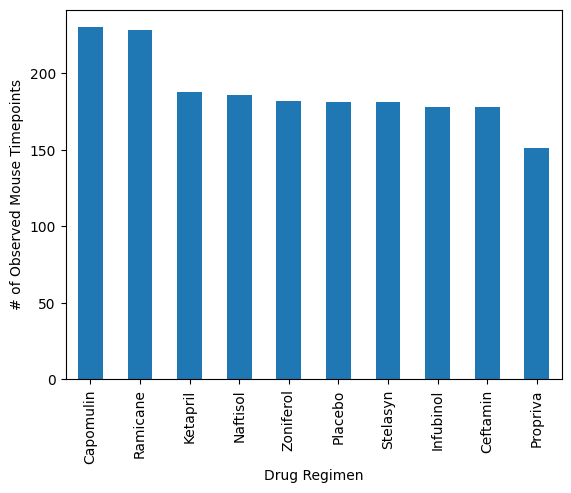

In [83]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_count = cleaned_df["Drug Regimen"].value_counts()
drug_regimen_count.plot(kind="bar")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()



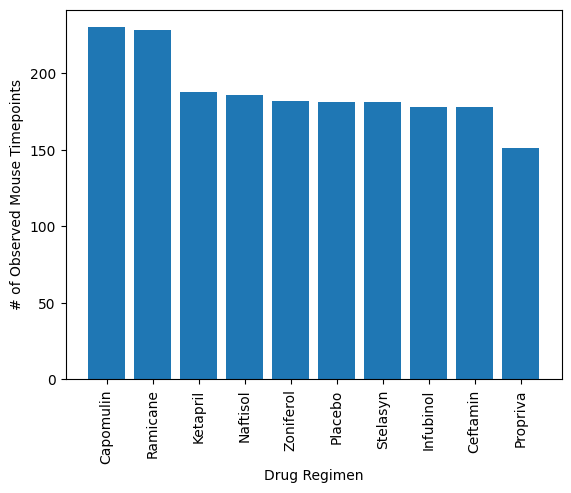

In [84]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen_count.index, drug_regimen_count.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


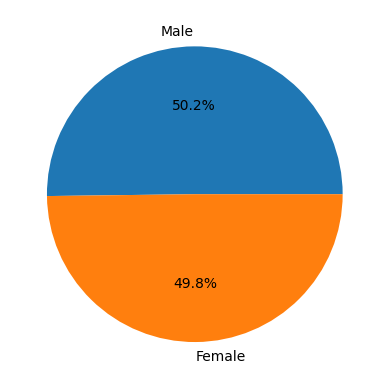

In [85]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = combined_df[['Mouse ID', 'Sex']].drop_duplicates()
gender_count = unique_mice_gender['Sex'].value_counts()

# Make the pie chart
gender_count.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.show()




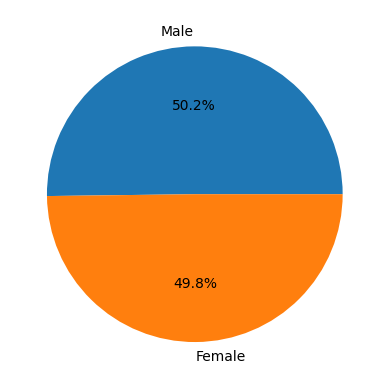

In [86]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = combined_df[['Mouse ID', 'Sex']].drop_duplicates()
gender_count = unique_mice_gender['Sex'].value_counts()

# Make the pie chart
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')
plt.show()



## Quartiles, Outliers and Boxplots

In [87]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor_volume = cleaned_df.groupby(["Mouse ID"])["Timepoint"].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_tumor_volume, cleaned_df, on=["Mouse ID", "Timepoint"], how="inner")
final_tumor_volume


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [88]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:


    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]


    # add subset
    tumor_vol_data.append(tumor_vol)


    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{treatment} potential outliers: {outliers}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\RicardoGomez\AppData\Local\Temp\ipykernel_25004\1229746806.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data, labels=treatments, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 10})


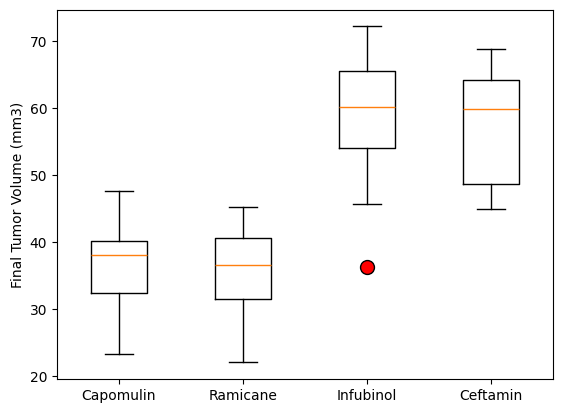

In [89]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 10})
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

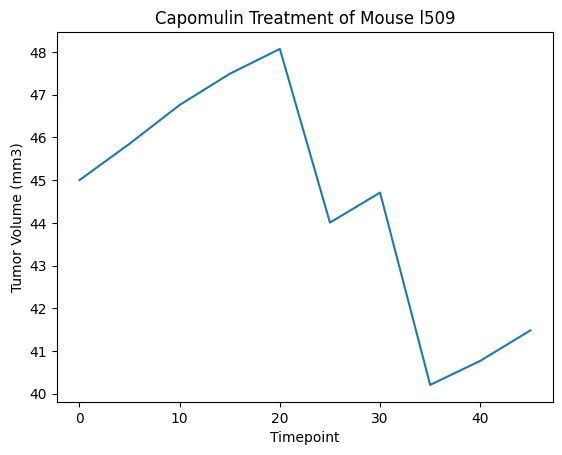

In [90]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]
mouse = "l509"
mouse_data = cleaned_df[cleaned_df["Mouse ID"] == mouse]
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin Treatment of Mouse {mouse}")
plt.show()


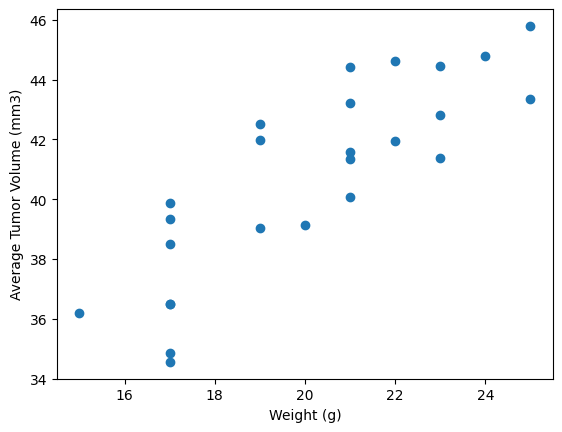

In [91]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg_tumor_vol = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capomulin_avg_tumor_vol = capomulin_avg_tumor_vol.reset_index()
capomulin_avg_tumor_vol = capomulin_avg_tumor_vol.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})
capomulin_avg_tumor_vol = pd.merge(capomulin_avg_tumor_vol, capomulin_df[["Mouse ID", "Weight (g)"]].drop_duplicates(), on="Mouse ID", how="inner")
plt.scatter(capomulin_avg_tumor_vol["Weight (g)"], capomulin_avg_tumor_vol["Average Tumor Volume"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()






## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


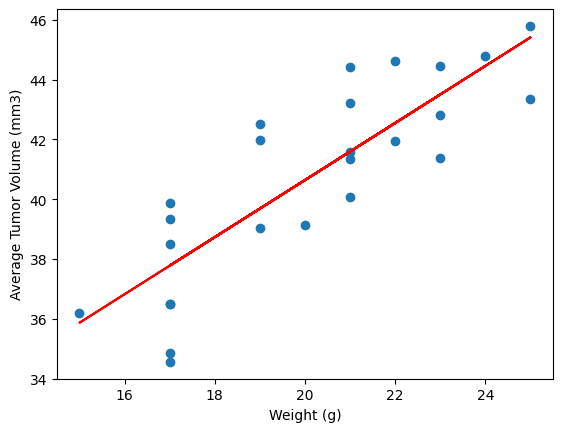

In [92]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_avg_tumor_vol["Weight (g)"], capomulin_avg_tumor_vol["Average Tumor Volume"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_avg_tumor_vol["Weight (g)"], capomulin_avg_tumor_vol["Average Tumor Volume"])
regress_values = capomulin_avg_tumor_vol["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capomulin_avg_tumor_vol["Weight (g)"], capomulin_avg_tumor_vol["Average Tumor Volume"])
plt.plot(capomulin_avg_tumor_vol["Weight (g)"], regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

